In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Amazon_data = pd.read_csv('C:/Users/zswijaya/Documents/Git_Projects/Ecommerce-Sales-Analysis/Data/archive/Amazon Sale Report.csv', low_memory=False)

In [3]:
Amazon_data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
print(Amazon_data.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object


In [9]:
Amazon_data['Date'] = pd.to_datetime(Amazon_data['Date'], format='%m-%d-%y')


In [11]:
Amazon_data.isnull().sum()


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [37]:
# Dropping the columns 
Amazon_data.drop(columns=['Unnamed: 22', 'promotion-ids'], inplace=True)

# Dropping rows with missing currency values 
Amazon_data.dropna(subset=['currency'], inplace=True)

In [41]:
# Dropping the 'Courier Status' 
Amazon_data.drop(columns=['Courier Status'], inplace=True)
Amazon_data.drop(columns=['fulfilled-by'], inplace=True)


In [43]:
# Filling missing values in ship-related columns with 'Unknown'
Amazon_data[['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']] = Amazon_data[['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']].fillna('Unknown')


In [47]:
# Checking the number of missing values again to see the effect
missing_values_after = Amazon_data.isnull().sum()
print(missing_values_after)


index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64


In [53]:
# Display the first 5 rows of the dataset
print(Amazon_data.head())


   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category Size        ASIN  Qty currency  Amount    ship-city  \
0            Set    S  B09

In [55]:
# Get a summary of the dataset
print(Amazon_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121180 non-null  int64         
 1   Order ID            121180 non-null  object        
 2   Date                121180 non-null  datetime64[ns]
 3   Status              121180 non-null  object        
 4   Fulfilment          121180 non-null  object        
 5   Sales Channel       121180 non-null  object        
 6   ship-service-level  121180 non-null  object        
 7   Style               121180 non-null  object        
 8   SKU                 121180 non-null  object        
 9   Category            121180 non-null  object        
 10  Size                121180 non-null  object        
 11  ASIN                121180 non-null  object        
 12  Qty                 121180 non-null  int64         
 13  currency            121180 non-nul

In [57]:
# Get descriptive statistics
print(Amazon_data.describe())


               index                           Date            Qty  \
count  121180.000000                         121180  121180.000000   
mean    64483.115877  2022-05-12 12:08:14.814325760       0.961231   
min         0.000000            2022-03-31 00:00:00       0.000000   
25%     32285.750000            2022-04-20 00:00:00       1.000000   
50%     64474.500000            2022-05-10 00:00:00       1.000000   
75%     96680.250000            2022-06-04 00:00:00       1.000000   
max    128974.000000            2022-06-29 00:00:00       8.000000   
std     37222.531993                            NaN       0.214354   

              Amount  
count  121180.000000  
mean      648.561465  
min         0.000000  
25%       449.000000  
50%       605.000000  
75%       788.000000  
max      5584.000000  
std       281.211687  


In [27]:
# Extract year, month, and day into separate columns
Amazon_data['Year'] = Amazon_data['Date'].dt.year
Amazon_data['Month'] = Amazon_data['Date'].dt.month
Amazon_data['Day'] =Amazon_data['Date'].dt.day


In [39]:
categorical_cols = ['Status', 'Fulfilment','Category', 'B2B', 'fulfilled-by']
Amazon_data[categorical_cols] = Amazon_data[categorical_cols].astype('category')

In [42]:


# Number of unique values in key columns
unique_products = Amazon_data['SKU'].nunique()  # Unique product count
unique_orders = Amazon_data['Order ID'].nunique()  # Unique order count
total_revenue = Amazon_data['Amount'].sum()  # Total sales revenue

print(f"Total unique products: {unique_products}")
print(f"Total unique orders: {unique_orders}")
print(f"Total revenue: {total_revenue}")


Total unique products: 7195
Total unique orders: 120378
Total revenue: 78592678.29999998


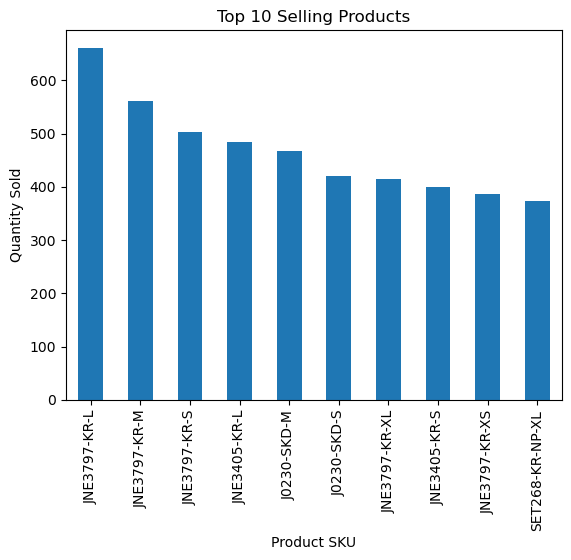

In [44]:
# Group by SKU and calculate total quantity sold
top_selling_products = Amazon_data.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 selling products
top_selling_products.plot(kind='bar', title='Top 10 Selling Products')
plt.xlabel('Product SKU')
plt.ylabel('Quantity Sold')
plt.show()


In [46]:
# Group by Year and Month, then calculate revenue
monthly_revenue =  Amazon_data.groupby(['Year', 'Month'])['Amount'].sum()


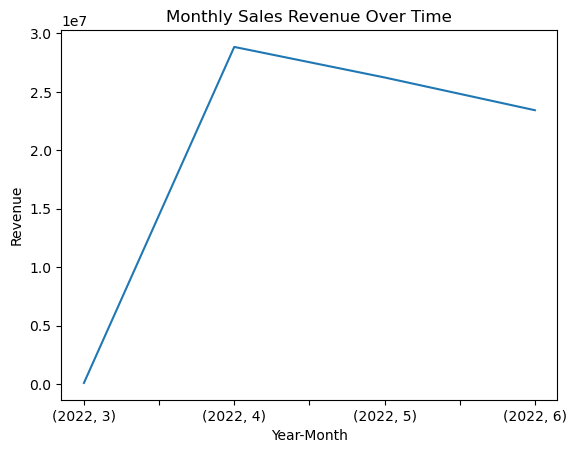

In [48]:
monthly_revenue.plot(kind='line', title='Monthly Sales Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.show()

In [50]:
# Calculate Average Order Value
average_order_value = Amazon_data.groupby('Order ID')['Amount'].sum().mean()


In [52]:
print(f"Average Order Value: {average_order_value:.2f}")


Average Order Value: 652.88


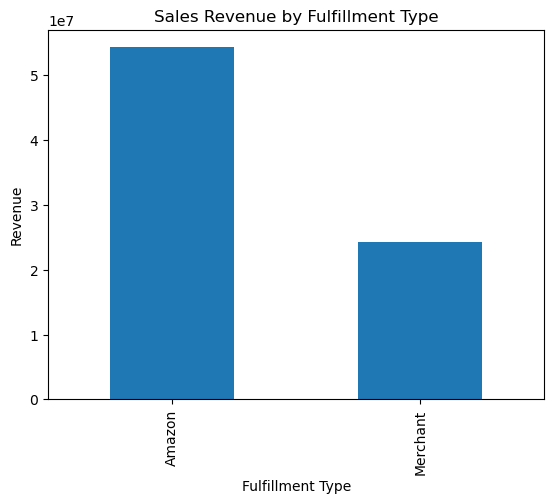

In [15]:
# Sales revenue by fulfillment type
fulfillment_sales = Amazon_data.groupby('Fulfilment')['Amount'].sum().sort_values(ascending=False)

# Plotting sales by fulfillment type
fulfillment_sales.plot(kind='bar', title='Sales Revenue by Fulfillment Type')
plt.xlabel('Fulfillment Type')
plt.ylabel('Revenue')
plt.show()


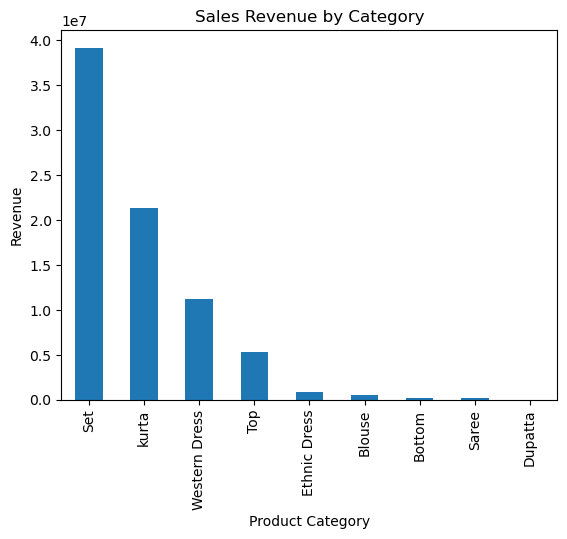

In [17]:
# Group by Category and calculate total revenue
category_sales = Amazon_data.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plotting revenue by category
category_sales.plot(kind='bar', title='Sales Revenue by Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()


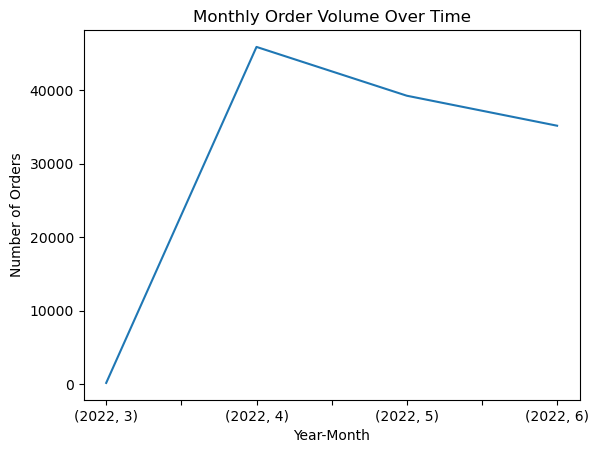

In [31]:
# Monthly order count
monthly_order_count = Amazon_data.groupby(['Year', 'Month'])['Order ID'].nunique()

# Plotting monthly order volume
monthly_order_count.plot(kind='line', title='Monthly Order Volume Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.show()
